In [32]:
import sympy as sp
def getMetric(lineElement, coordSystem="Cartesian", subs=None, overrideConst = False): #the override lets the code run faster if you know for sure your line element will work out
    if coordSystem not in ["Cartesian", "PlanePolar", "SphericalPolar", "CylindricalPolar"]:
        raise ValueError("Unknown coordinate system")

    lineElement=sp.expand(lineElement)
    coords = (t, x, y, z)

    dim = len(coords)
    g = sp.zeros(dim)

    for mu in range(dim):
        for nu in range(dim):
            coeff = lineElement.coeff(sp.diff(coords[mu]) * sp.diff(coords[nu]))
            if mu != nu and coeff != 0:
                g[mu, nu] = coeff.subs(subs) / 2
            else:
                g[mu, nu] = coeff.subs(subs)
                
    # Check for unexpected terms in the line element
    if not overrideConst:
        reconstructed_line_element = sum(g[i, j] * sp.diff(coords[i]) * sp.diff(coords[j]) for i in range(dim) for j in range(dim))
        if sp.simplify(lineElement.subs(subs) - reconstructed_line_element) != 0:
            raise ValueError("Line element contains terms that are not pure differentials of the coordinates used")
    return g

In [59]:
vs, sigma, R, lam = sp.symbols('v_s sigma R lambda')
t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)

dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)

# for now, define constants as symbols
xs, r, f_r, c = sp.symbols("x_s r f_r c")

lineElement = -c**2*dt**2 + (dx - vs*f_r*dt)**2 + dy**2 + dz**2
display(lineElement)

# order of substitutions matter!!!
subs= [
    (f_r, (sp.tanh(sigma * (r + R)) - sp.tanh(sigma * (r - R))) / (2 * sp.tanh(sigma * R))),
    (r, sp.sqrt((x - xs)**2 + y**2 + z**2)),
    (xs, vs*t), # since its steady state
]

metric=getMetric(lineElement, "Cartesian", subs, True)
metric

-c**2*Derivative(t(lambda), lambda)**2 + (-f_r*v_s*Derivative(t(lambda), lambda) + Derivative(x(lambda), lambda))**2 + Derivative(y(lambda), lambda)**2 + Derivative(z(lambda), lambda)**2

Matrix([
[-c**2 + v_s**2*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))**2/(4*tanh(R*sigma)**2), -v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(2*tanh(R*sigma)), 0, 0],
[                -v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(2*tanh(R*sigma)),                                                                                                                                                                                                        1, 0, 0],
[                                                                                                                                      

## computation connection coeffecients (christoffel)

In [60]:
import numpy as np
from itertools import product

metric_inv = metric.inv()
print("start computation")
n=4
X = [t, x, y, z]
# computing the symbols using the metric equation
# Create array to store the computed christoffel symbols.
christoffel_symbols = np.zeros(shape=n, dtype='object')
simple = False
for i in range(n):
    dummy_matrix = sp.Matrix.zeros(n,n)
    for (j,k,l) in product(range(n), repeat=3):
        dummy_matrix[j,k] += (
            sp.Rational(1/2)*metric_inv[i,l] * (sp.diff(metric[l,j],X[k]) 
            +sp.diff(metric[l,k],X[j]) - sp.diff(metric[j,k],X[l]))
        )
        print(f"done connection j: {j} k: {k} l: {l}")
    christoffel_symbols[i] = sp.simplify(dummy_matrix) if simple else dummy_matrix

start computation
done connection j: 0 k: 0 l: 0
done connection j: 0 k: 0 l: 1
done connection j: 0 k: 0 l: 2
done connection j: 0 k: 0 l: 3
done connection j: 0 k: 1 l: 0
done connection j: 0 k: 1 l: 1
done connection j: 0 k: 1 l: 2
done connection j: 0 k: 1 l: 3
done connection j: 0 k: 2 l: 0
done connection j: 0 k: 2 l: 1
done connection j: 0 k: 2 l: 2
done connection j: 0 k: 2 l: 3
done connection j: 0 k: 3 l: 0
done connection j: 0 k: 3 l: 1
done connection j: 0 k: 3 l: 2
done connection j: 0 k: 3 l: 3
done connection j: 1 k: 0 l: 0
done connection j: 1 k: 0 l: 1
done connection j: 1 k: 0 l: 2
done connection j: 1 k: 0 l: 3
done connection j: 1 k: 1 l: 0
done connection j: 1 k: 1 l: 1
done connection j: 1 k: 1 l: 2
done connection j: 1 k: 1 l: 3
done connection j: 1 k: 2 l: 0
done connection j: 1 k: 2 l: 1
done connection j: 1 k: 2 l: 2
done connection j: 1 k: 2 l: 3
done connection j: 1 k: 3 l: 0
done connection j: 1 k: 3 l: 1
done connection j: 1 k: 3 l: 2
done connection j: 1 

In [61]:
for i in range(n):
    display(christoffel_symbols[i])

Matrix([
[-v_s**2*(2*sigma*v_s*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) - 2*sigma*v_s*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(8*c**2*tanh(R*sigma)**2) + (-v_s*tanh(R*sigma - sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - v_s*tanh(R*sigma + sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))*(-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)

Matrix([
[v_s**2*(-v_s*tanh(R*sigma - sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - v_s*tanh(R*sigma + sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))*(2*sigma*v_s*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) - 2*sigma*v_s*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(16*c**2*tanh(R*sigma)**3) + (-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)

Matrix([
[-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + 2*sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(8*tanh(R*sigma)**2), v_s*(-sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))/(4*tanh(R*sigma)), 0, 0],
[                   

Matrix([
[-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + 2*sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(8*tanh(R*sigma)**2), v_s*(-sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))/(4*tanh(R*sigma)), 0, 0],
[                   

In [62]:
C = christoffel_symbols

Definitions of momenta using trajectory of photon:

$$
\frac{dt}{d\lambda}-p^t=0
$$
$$
\frac{dx}{d\lambda}-p^x=0
$$
$$
\frac{dy}{d\lambda}-p^y=0
$$

In [63]:
pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)
pz = sp.diff(y, lam)

## THE FOLLOWING STILL NEEDS TO BE EDITED FOR MODULARITY
$$
\frac{dp^t}{d\lambda}+\Gamma^t_{tt}(p^t)^2+\Gamma^t_{xx}(p^x)^2+2\Gamma^t_{tx}p^tp^x+2\Gamma^t_{ty}p^tp^y+2\Gamma^t_{xy}p^xp^y=0
$$
$$
\frac{dp^x}{d\lambda}+\Gamma^x_{tt}(p^t)^2+\Gamma^x_{xx}(p^x)^2+2\Gamma^x_{tx}p^tp^x+2\Gamma^x_{ty}p^tp^y+2\Gamma^x_{xy}p^xp^y=0
$$
$$
\frac{dp^y}{d\lambda}+\Gamma^y_{tt}(p^t)^2+2\Gamma^y_{tx}p^tp^x=0
$$

### Model assumes symmetry
[0, 1, 2, 3]=[t,x,y,z]

In [64]:
Ct, Cx, Cy, Cz = C[0], C[1], C[2], C[3]
dptdl = -1 * (Ct[0,0] * pt**2 + Ct[1,1] * px**2 + Ct[2,2] * py**2 + Ct[3,3] * pz**2 + 2 * (Ct[0,1] * pt * px + Ct[0,2] * pt * py + Ct[0,3] * pt * pz + Ct[1,2] * px * py + Ct[1,3] * px * pz + Ct[2,3] * py * pz))
dpxdl = -1 * (Cx[0,0] * pt**2 + Cx[1,1] * px**2 + Cx[2,2] * py**2 + Cx[3,3] * pz**2 + 2 * (Cx[0,1] * pt * px + Cx[0,2] * pt * py + Cx[0,3] * pt * pz + Cx[1,2] * px * py + Cx[1,3] * px * pz + Cx[2,3] * py * pz))
dpydl = -1 * (Cy[0,0] * pt**2 + Cy[1,1] * px**2 + Cy[2,2] * py**2 + Cy[3,3] * pz**2 + 2 * (Cy[0,1] * pt * px + Cy[0,2] * pt * py + Cy[0,3] * pt * pz + Cy[1,2] * px * py + Cy[1,3] * px * pz + Cy[2,3] * py * pz))
dpzdl = -1 * (Cz[0,0] * pt**2 + Cz[1,1] * px**2 + Cz[2,2] * py**2 + Cz[3,3] * pz**2 + 2 * (Cz[0,1] * pt * px + Cz[0,2] * pt * py + Cz[0,3] * pt * pz + Cz[1,2] * px * py + Cz[1,3] * px * pz + Cz[2,3] * py * pz))

# dptdl = dptdl.simplify()
# dpxdl = dpxdl.simplify()
# dpydl = dpydl.simplify()
# dpzdl = dpzdl.simplify()

## Recursive system

In [65]:
import numpy as np
import time

# dLambda
dL=0.001
meters = 25
count = 0
angles_len = 10
angles = np.linspace(0, 2*np.pi, 1)

values = np.zeros((1, 8))
values[:,0] = 0   
values[:, 1] = 0.4
values[:, 2] = 0.1
values[:, 3] = 0.2
values[:, 5] = 0.5 # x'
values[:, 6] = 0.3 #y'
values[:, 7] = 0 # z'

## Initial conditions must be fixed to satisfy:
\begin{align*}
B &= 2g_{tx}p^x + 2g_{ty}p^y + 2g_{tz}p^z, \\
C &= g_{xx}(p^x)^2 + 2g_{xy}p^x p^y + 2g_{xz}p^x p^z + g_{yy}(p^y)^2 + 2g_{yz}p^y p^z + g_{zz}(p^z)^2, \\
p^t &= \frac{-B \pm \sqrt{B^2 - 4g_{tt}C}}{2g_{tt}}.
\end{align*}

In [67]:
Bquad=2*(metric[0, 1]*px+metric[0, 2]*py+metric[0, 3]*pz)
Cquad=metric[1, 1]*px**2+metric[2, 2]*py**2+metric[3, 3]*pz**2+2*(
      metric[1, 2]*px*py+metric[1, 3]*px*pz+metric[2, 3]*py*pz
)


pt1 = (-Bquad+sp.sqrt(Bquad**2-4*metric[0,0]*Cquad))/(2*metric[0,0])
pt2 = ((-Bquad - sp.sqrt(Bquad**2 - 4 * metric[0, 0] * Cquad)) / (2 * metric[0, 0]))


pt1_lambda = sp.lambdify((t,x,y,z,vs,R,sigma,c,px,py,pz), pt1, "numpy")
pt2_lambda = sp.lambdify((t,x,y,z,vs,R,sigma,c,px,py,pz), pt2, "numpy")

In [41]:
Bquad

-v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))*Derivative(x(lambda), lambda)/tanh(R*sigma)

## Following code assumes continuity with pt1 solution (plus)

In [68]:
args = (values[:, 0], values[:, 1], values[:, 2], values[:, 3], 1 , 2, 1, 3*10**8, values[:, 5], values[:, 6], values[:, 7])
print(pt1_lambda(*args))
print(pt2_lambda(*args))
values[:,4]=pt1_lambda(*args)

[-1.66666667e-09]
[1.66666666e-09]


In [43]:
values

array([[  0.        ,   4.        ,   4.        ,   4.        ,
        -10.00054348,  10.        ,  30.        ,   0.        ]])

In [71]:
# define initial conditions
dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)
geods=[]
iterations = int(meters//dL)
L = 0
# append a numpy copy of the array to geod
geods.append(np.copy(values))

dptdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dptdl, "numpy")
dpxdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dpxdl, "numpy")
dpydl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dpydl, "numpy")
dpzdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dpzdl, "numpy")

print("starting iterations")
start = time.time()

for i in range(iterations):
    L_=L
    L+=dL

    args = (values[:, 0], values[:, 1], values[:, 2], values[:, 3], values[:, 4], values[:, 5], values[:, 6],
            values[:, 7], 1, 1, 1, 3*10**8)

    dp=[
        dptdl_lambda(*args),
        dpxdl_lambda(*args),
        dpydl_lambda(*args),
        dpzdl_lambda(*args)
    ]

    values[:,4:] += dL * np.array(dp).T # update the velocities
    values[:, 0:4] += dL * values[:, 4:] # update positions
    geods.append(np.copy(values))
    count += 1
    print("Percentage done: {:3.5f} %".format((count/iterations)*100), end="\r")




print("Elapsed time: {:3.2f} seconds".format(time.time()-start))
geods = np.array(geods)


starting iterations
Elapsed time: 84.84 seconds%


In [ ]:
geods.shape

## Plotting

In [72]:
import plotly.graph_objects as go
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

# Define the figure
fig = go.Figure()

# Normalize and prepare colors for geodesics
norm = Normalize(vmin=np.min(angles), vmax=np.max(angles))
colors = cm.viridis(norm(angles))
hex_colors = [f'rgb({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)})' for c in colors]

# Plotting each geodesic with its corresponding color
angs = 1
for i in range(angs):
    geod = [g[i, :] for g in geods]
    ts, xs, ys, zs = geod[:4]
    xs = [x for x in xs]
    ys = [float(y) for y in ys]
    zs = [float(z) for z in zs]

    # Position plot
    fig.add_trace(go.Scatter3d(x=xs, y=ys, z=zs, mode='lines', line=dict(color="green"), name='Position'))
    dx, dy, dz = geod[1][5:]

    # Adding a vector trace from the start marker
    fig.add_trace(go.Scatter3d(
        x=[xs[1], xs[1] + dx],
        y=[ys[1], ys[1] + dy],
        z=[zs[1], zs[1] + dz],
        mode='lines+markers',
        marker=dict(size=4, color='orange'),  # Style the endpoint marker
        line=dict(color='orange', width=6),   # Style the line
        name='Velocity'
    ))


fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='red'),  # Adjust size and color as needed
    name='Origin'
))
fig.add_trace(go.Scatter3d(
    x=[xs[1]], y=[ys[1]], z=[zs[1]],
    mode='markers',
    marker=dict(size=5, color='green'),  # Adjust size and color as needed
    name='Start'
))
axisLim=max(abs((min(min(xs, ys, zs)))), max(max(xs, ys, zs)))
axisLim+=2
fig.update_layout(
    width=800,
    height=800,
    scene=dict(
        xaxis_title='X (x)',
        yaxis_title='Y (y)',
        zaxis_title='Z (z)',
        aspectmode='cube',  # Ensure equal scaling
        
        xaxis=dict(range=[-axisLim, axisLim]), # Set axis limits to match sphere radius
        yaxis=dict(range=[-axisLim, axisLim]),
        zaxis=dict(range=[-axisLim, axisLim])
    ),
    title='Geodesic Trajectories and Spherical Object'
)

fig.show()


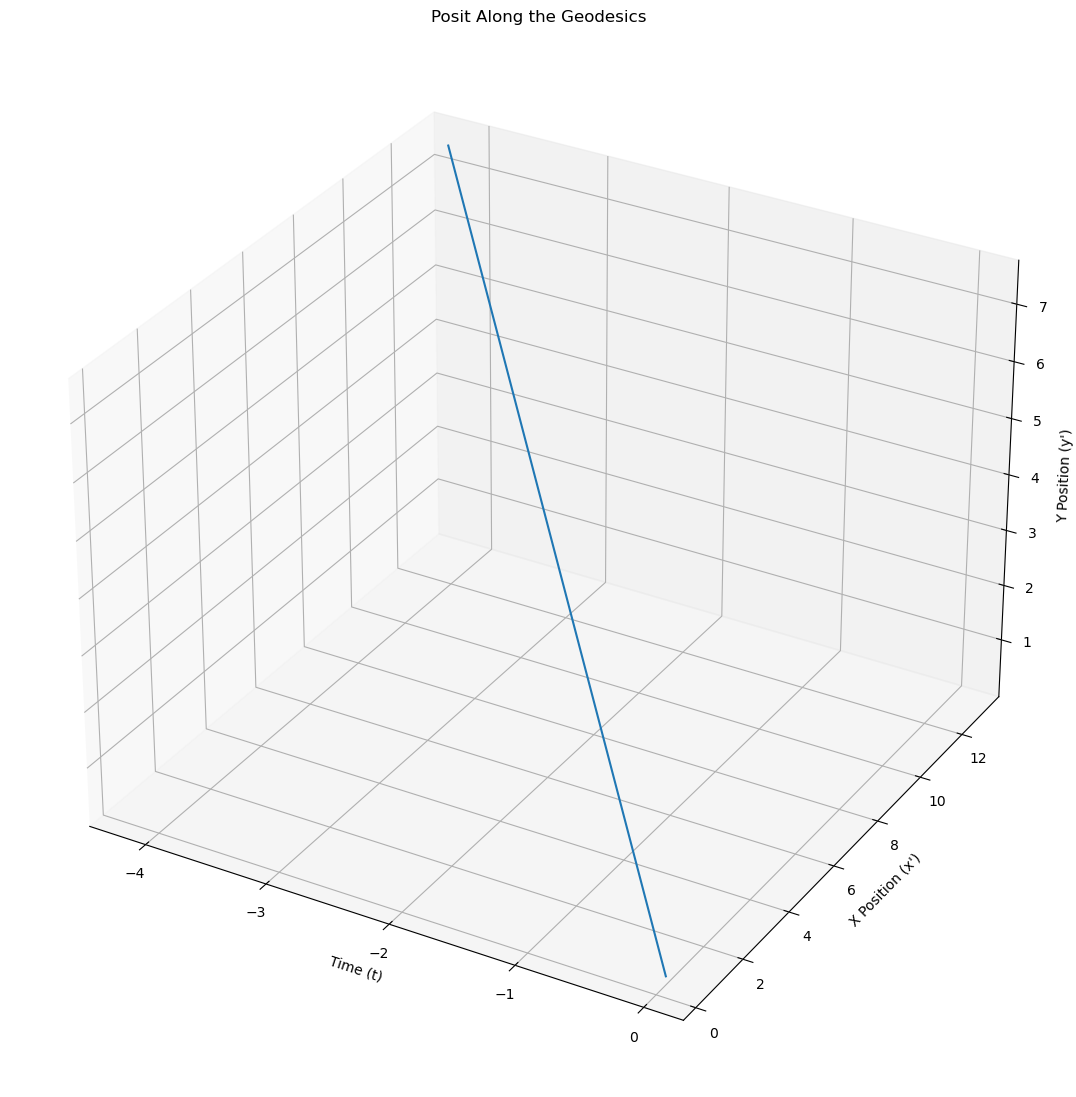

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase
import numpy as np

fig = plt.figure(figsize=(30, 30))
ax2 = fig.add_subplot(121, projection='3d')

geods_transposed = geods.transpose(1, 0, 2)

for geod_angle in geods_transposed:
    positions = geod_angle[:, 0:4]
    velocities = geod_angle[:, 4:]

    ts, xs, ys, zs = zip(*positions)
    tps, xps, yps, zps =  zip(*velocities)

    # Plot for velocity
    ax2.plot(ts, xs, ys)
    ax2.set_xlabel('Time (t)')
    ax2.set_ylabel("X Position (x')")
    ax2.set_zlabel("Y Position (y')")
    ax2.set_title("Posit Along the Geodesics")

plt.show()




# for geod, color, theta in zip(geods, colors, angles):
#     print(geod.shape)
#     positions = geod[:, 0:4]
#     velocities = geod[:, 4:]

#     ts, xs, ys, zs = zip(*positions)
#     tps, xps, yps, zps =  zip(*velocities)


#     # Plot for velocity
#     ax2.plot(ts, xps, yps, color=color)
#     ax2.set_xlabel('Time (t)')
#     ax2.set_ylabel("X Velocity (x')")
#     ax2.set_zlabel("Y Velocity (y')")
#     ax2.set_title("Velocity Along the Geodesics")

# Adding legends outside the plots
# ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Initial angles")
# ax2.legend(['Velocity Profiles'], loc='center left', bbox_to_anchor=(1.05, 0.5))

# plt.tight_layout()
#

In [76]:
import plotly.graph_objects as go
import numpy as np

geods_transposed = geods.transpose(1, 0, 2)

fig = go.Figure()
count = 0

for geod_angle in geods_transposed:
  positions = geod_angle[:, 0:4]
  velocities = geod_angle[:, 4:]

  ts, xs, ys, zs = zip(*positions)
  tps, xps, yps, zps =  zip(*velocities)

  # Plot for velocity
  fig.add_trace(go.Scatter3d(x=ts, y=xs, z=ys, mode='lines'))

  # Add initial velocity vector
  fig.add_trace(go.Cone(x=[ts[0]], y=[xs[0]], z=[ys[0]],
              u=[tps[0]], v=[xps[0]], w=[yps[0]],
              sizemode="scaled",
              sizeref=0.2,
              anchor="tail"))
  count += 1
  print("plotting, currently: {}%".format(str((count/angles_length)*100)), end="\r")

fig.update_layout(scene = dict(
          xaxis_title='Time (t)',
          yaxis_title="X Position (x')",
          zaxis_title="Y Position (y')"),
          width=700,
          margin=dict(r=20, b=10, l=10, t=10))

fig.show()

NameError: name 'angles_length' is not defined

In [51]:
np.array([g[0, :] for g in geods]).shape

(25000, 8)

In [ ]:
!pip freeze > req.txt

In [ ]:
xs

In [ ]:
np.array([geod[9,:] for geod in geods]).shape

In [ ]:
geods[0].shape

In [ ]:
geods[0][0][1][1:4]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

fig = plt.figure(figsize=(14, 7))

# Create a new subplot for position
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('X Position (x)')
ax.set_ylabel('Y Position (y)')
ax.set_zlabel('Z Position (z)')
ax.set_title('Geodesic Trajectories in Space-Time')

# Create a new subplot for velocity
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel("Z Velocity (z')")
ax2.set_zlabel("Y Velocity (y')")
ax2.set_title("Velocity Along the Geodesics")

# Normalize for the color map to correspond to the range of theta_0
norm = Normalize(vmin=np.min(angles), vmax=np.max(angles))

# Generate a color map ranging from 0 to 1 over the number of geodesics
colors = cm.viridis(norm(angles))

# Plotting each geodesic with its corresponding color
for geod, color in zip(geods, colors):
    lambdas = list(geod.keys())
    positions = [geod[key][0] for key in lambdas]
    velocities = [geod[key][1] for key in lambdas]
    ts, xs, ys, zs = zip(*positions)
    tps, xps, yps, zps = zip(*velocities)

    # Position plot
    ax.plot(xs, ys, zs, color=color)

    # Velocity plot
    ax2.plot(ts, zps, yps, color=color)

# Create a sphere at the origin
r_s = 2*G_val*M_val/c_val**2  # Set the radius of the sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r_s*np.cos(u)*np.sin(v)
y = r_s*np.sin(u)*np.sin(v)
z = r_s*np.cos(v)

# Plot sphere in both subplots
ax.plot_surface(x, y, z, color='b', alpha=0.5)

# Create a colorbar as a legend
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', fraction=0.015, pad=0.1)
cbar.set_label('Initial angle $\\theta_0$ (radians)')

plt.show()

In [ ]:
# Creating 2D plots for t-x, t-y, and x-y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# t-x plot
ax1.plot(ts, xs, 'b.-')  # 'b.-' is the style: blue line with dots
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('X Position (x)')
ax1.set_title('Time vs X Position')
ax1.grid(True)

# t-y plot
ax2.plot(ts, zs, 'r.-')  # 'r.-' is the style: red line with dots
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('z Position (z)')
ax2.set_title('Time vs z Position')
ax2.grid(True)

# x-y plot
ax3.plot(zs, ys, 'g.-')  # 'g.-' is the style: green line with dots
ax3.set_xlabel('z Position (z)')
ax3.set_ylabel('Y Position (y)')
ax3.set_title('z Position vs Y Position')
ax3.grid(True)

# Display the plots next to each other
plt.tight_layout()
plt.show()

In [ ]:
{k: v[1] for k, v in geods[0].items()}

In [ ]:
geods